In [2]:
%matplotlib inline
import random, math
import numpy as np
import thinkstats2, thinkplot

###Estimation

When given a sample, and you want to figure out what distribution...

*  use sample mean, $\hat{x}$ to estimate the mean, $\mu$.    $\hat{x}$ is called the **estimator**.  This works fine until outliers are introduced.

**Root Mean Squared Error**: way of grading estimators.  amount you can expect an estimator to be off on average.

In [3]:
def RMSE(estimates, actual):
    e2 = [(estimate - actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)
    
def Estimate(n=7, m=1000):
    mu = 0
    sigma = 1
    
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
#         xs.append(92)
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    print 'RMSE xbar', RMSE(means, mu)
    print 'RMSE median', RMSE(medians, mu)

Estimate()

RMSE xbar 0.36439049883
RMSE median 0.435166153683


In practice, you don't know 'actual'.  This experiement is to compare the performance of the two estimators.

**sample variance** as an estimator of variance is **biased** by sample size.  Calculating with 'n - 1' is unbiased. 

An estimator is **unbiased** if the mean error after many iterations is 0

In [4]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def Estimate2(n=8, m=1000):
    mu = 0
    sigma = 1
    
    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
    print "Mean Error biased", MeanError(estimates1, sigma**2)
    print "Mean Error unbiased", MeanError(estimates2, sigma**2)
    print "RMSE biased", RMSE(estimates1, sigma**2)
    print "RMSE unbiased", RMSE(estimates2, sigma**2)
Estimate2(8,10)
print
Estimate2(8, 1000)
print 
Estimate2(8, 100000)

Mean Error biased -0.133506932546
Mean Error unbiased -0.0097222086235
RMSE biased 0.472580189157
RMSE unbiased 0.518182446221

Mean Error biased -0.116677864079
Mean Error unbiased 0.00951101248122
RMSE biased 0.481268949427
RMSE unbiased 0.533697565554

Mean Error biased -0.127893194047
Mean Error unbiased -0.00330650748191
RMSE biased 0.48350379099
RMSE unbiased 0.532904393021


**sampling error** variation in the estimate caused by random selection.


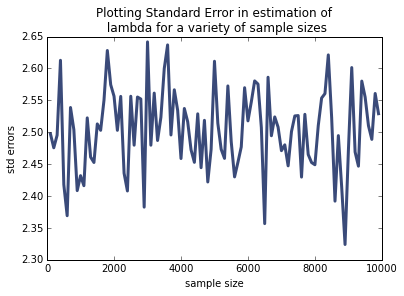

In [26]:
def SimulateSample(mu=90, sigma=7.5, n=9, m=1000, plot=False):
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
        
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stderror = RMSE(means, mu)
    
    
    if plot:
        print 'confidence interval:', ci
        print 'standard error', stderror
        VertLine(ci[0])
        VertLine(ci[1])
        thinkplot.Cdf(cdf)
        thinkplot.Config(title='sampling distribution',
                 xlabel='Sample mean',
                 ylabel='CDF')
    return stderror, ci
# SimulateSample(plot=True)
stdErrs = []
nRange = range(100,10000,100)
for i in nRange:
    s, ci = SimulateSample(i)
    stdErrs.append(s)
thinkplot.Plot(nRange, stdErrs)
thinkplot.Show(xlabel='sample size',
               ylabel='std errors',
               title ='Plotting Standard Error in estimation of\n mu for a variety of sample sizes')
    

###Measuring Sampling Error

**Standard Error** is a measure of how far off we expect to be off on average.  RMSE.  Not to be confused with Standard deviation, which describes the amount of variability in a sample.

**Confidence Interval** range that includes a given fraction of the sampling distribution.  Tells you how much  the estimate would vary if you ran it again. (doesn't have to do with 90% probability)

###Sampling Bias

self-selection, for example.  answering the phone may correlate with weight of responents.  refusing to answer the question.  Populations of people who don't have phones or don't list their numbers.

###Measurement Errors

people round up or down.

###Exponential Distributions:

to estimate $\lambda$, use 
$$L = 1 / \bar{x}$$
L is the maximum likelihood estimator of $\lambda$.  can also use median as estimator, to deal with outliers like so: 
$$L_m = ln(2)/m$$
** check out how to find median of exponential

In [7]:
def Estimate3(n=7, m=1000):
    lam = 2
    
    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    print 'RMSE L', RMSE(means, lam)
    print 'RMSE Lm', RMSE(medians, lam)
    print 'Mean Error L', MeanError(means, lam)
    print 'Mean Error Lm', MeanError(medians, lam)
Estimate3()

RMSE L 1.09584002241
RMSE Lm 1.97022148855
Mean Error L 0.334530613946
Mean Error Lm 0.517107228458


Turns out that $\bar{x}$ is an unbiased estimator of the mean of the distribution, but L is a biased estimator of $\lambda$

##Exercises

####8.1

see chap08ex.py.  What I learned about bias is that the unbiased version of variance has a higher mean squared error.  Neither sample median nor sample mean seem to be biased estimators of their respective stats.

####8.2
*  simulate $\lambda = 2$ n = 10 over 1000 trials and plot the sampling distribution of the estimate L.  Compute the standard error and the 90% confidence interval

*  repeat with several values of n

n=10
 ci: (1.3095257137231309, 3.6356464582610424)
 sterr: 0.761501486406


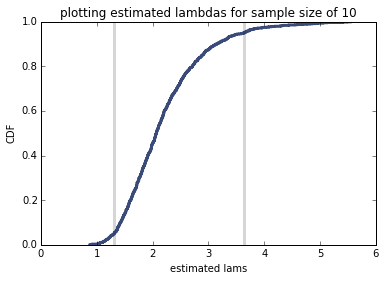

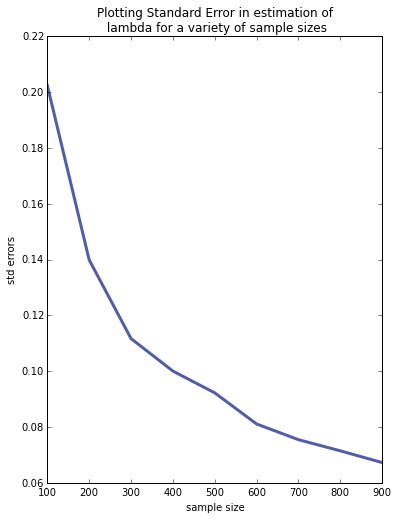

In [104]:
def SimulateSampleExpo(n = 10, m = 1000, plot=False):
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)
    lam = 2.0
    lams = []
    for j in range(m):
        xs = np.random.exponential(1/lam, n)
        L = 1 / np.mean(xs)
        lams.append(L)
    
    cdf = thinkstats2.Cdf(lams)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    stderr = RMSE(lams, lam)
    
    
    if plot:
        VertLine(ci[0])
        VertLine(ci[1])
        thinkplot.Cdf(cdf)
        thinkplot.Config(xlabel='estimated lams',
                       ylabel='CDF',
                       title='plotting estimated lambdas for sample size of %d' % n)
        thinkplot.figure()
        print 'n=%d\n ci: %s\n sterr: %s' % (n,ci, stderr)

    return stderr, ci
nList = [10]
for n in nList:
    SimulateSampleExpo(n,plot=True)

stdErrs = []
nRange = range(100,1000,100)
for i in nRange:
    s, ci = SimulateSampleExpo(i)
    stdErrs.append(s)
thinkplot.Plot(nRange, stdErrs)
thinkplot.Show(xlabel='sample size',
               ylabel='std errors',
               title ='Plotting Standard Error in estimation of\n lambda for a variety of sample sizes')
    

####8.3

sampling number of goals scored in a game versus sampling time between goals.



In [78]:
def game(lam):
    """
    lam: goals per game
    """
    gameLength = 1.0
    numGoals = -1 # b/c goal added at beginning of game
    while gameLength > 0:
        numGoals +=1
        timeBetweenGoals = np.random.exponential(1.0/lam)
        gameLength -= timeBetweenGoals
    return numGoals




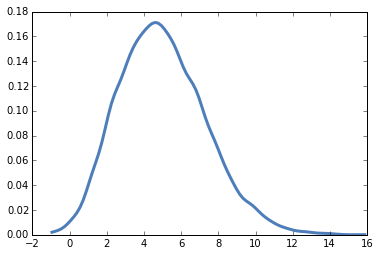

In [79]:
nGoals = []
for i in range(10000):
    goals = game(5)
    nGoals.append(goals)
nGoals = thinkstats2.Jitter(nGoals,1.0)
goals_pdf = thinkstats2.EstimatedPdf(nGoals)
thinkplot.Pdf(goals_pdf)
    

 ci: (0, 4)
numGames: 10
 mean error: -1.2
 rmse: 1.73205080757
 ci: (0, 4)
numGames: 1000
 mean error: -0.005
 rmse: 1.38455769111
 ci: (0, 5)
numGames: 100000
 mean error: 0.00356
 rmse: 1.41257920132


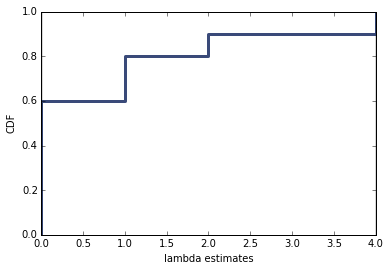

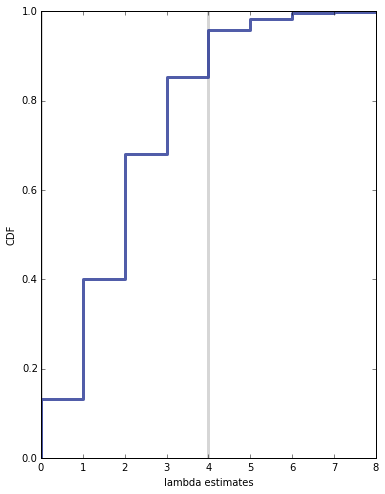

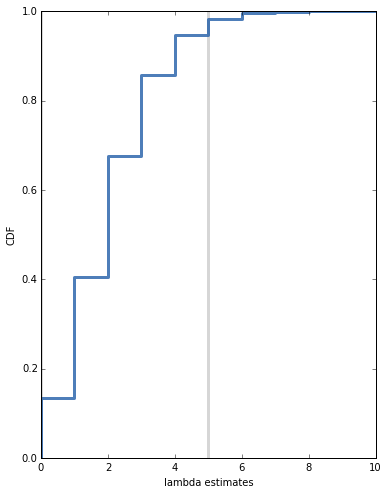

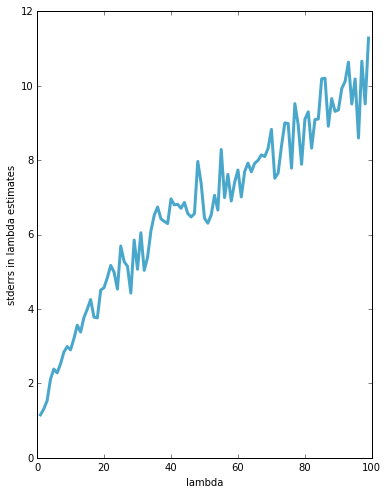

In [108]:
def simGames(numGames, lam, plot=False):
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)
        
    lam_ests = []
    for i in range(numGames):
        estLam = game(lam)
        lam_ests.append(estLam)
    

    lam_cdf = thinkstats2.Cdf(lam_ests)
    stderr = RMSE(lam_ests, lam)
    ci = lam_cdf.Percentile(5), lam_cdf.Percentile(95)
    
    if plot:
        print ' ci:',ci
        print 'numGames:',numGames
        print ' mean error:', MeanError(lam_ests, lam)
        print ' rmse:', stderr
        VertLine(ci[0])
        VertLine(ci[1])
        thinkplot.Cdf(lam_cdf)
        thinkplot.Config(xlabel='lambda estimates',
                         ylabel='CDF')
        thinkplot.figure()
    return stderr, ci
simGames(10,2,True)
simGames(1000,2,True)
simGames(100000,2,True)

def PlotLambdas():
    errs = []
    lamRange = range(1,100)
    for i in lamRange:
        stdErr, ci = simGames(100, i)
        errs.append(stdErr)
    thinkplot.Plot(lamRange,errs)
    thinkplot.Show(xlabel='lambda',
                   ylabel='stderrs in lambda estimates')
PlotLambdas()


It seems like the method for estimating lambda is biased, but that it may be less biased for higher values of lambda.